<a href="https://colab.research.google.com/github/plthiyagu/Personnel/blob/master/Outlier_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/plthiyagu/Personnel/master/Dataset/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


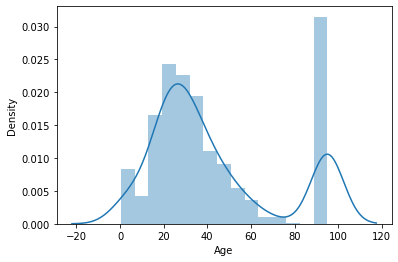

In [8]:
sns.distplot(df.Age.fillna(95))

Text(0, 0.5, 'Number of Passengers')

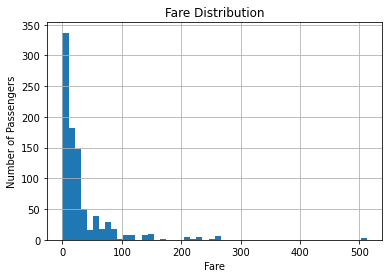

In [4]:

fig = df.Fare.hist(bins=50)
fig.set_title('Fare Distribution')
fig.set_xlabel('Fare')
fig.set_ylabel('Number of Passengers')

Text(0, 0.5, 'Fare')

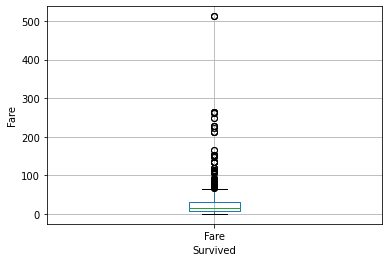

In [5]:
# another way of visualising outliers is using boxplots and whiskers,
# which provides the quantiles (box) and inter-quantile range (whiskers),
# with the outliers sitting outside the error bars (whiskers).

# All the dots in the plot below are outliers according to the quantiles + 1.5 IQR rule

fig = df.boxplot(column='Fare')
fig.set_title('')
fig.set_xlabel('Survived')
fig.set_ylabel('Fare')

In [6]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [8]:
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)

Lower_fence = df.Fare.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.Fare.quantile(0.75) + (IQR * 1.5)

Upper_fence, Lower_fence, IQR

(65.6344, -26.724, 23.0896)

In [9]:
print('total passengers: {}'.format(df.shape[0]))

print('passengers that paid more than 65: {}'.format(
    df[df.Fare > 65].shape[0]))

print('passengers that paid more than 100: {}'.format(
    df[df.Fare > 100].shape[0]))

total passengers: 891
passengers that paid more than 65: 116
passengers that paid more than 100: 53


In [ ]:
total_passengers = np.float(data.shape[0])

print('total passengers: {}'.format(data.shape[0] / total_passengers))

print('passengers that paid more than 65: {}'.format(
    data[data.Fare > 65].shape[0] / total_passengers))

print('passengers that paid more than 100: {}'.format(
    data[data.Fare > 100].shape[0] / total_passengers))

In [10]:
# let's create a separate dataframe for high fare payers
high_fare_df = df[df.Fare>100]

# ticket: it indicates the people that bought their fares together
high_fare_df.groupby('Ticket')['Fare'].count()

Ticket
113503      1
113760      4
113781      4
16966       2
17421       4
19950       4
24160       3
35273       3
36928       2
PC 17483    1
PC 17558    2
PC 17569    2
PC 17582    3
PC 17608    2
PC 17611    2
PC 17755    3
PC 17757    4
PC 17758    2
PC 17760    3
PC 17761    2
Name: Fare, dtype: int64

In [11]:
multiple_tickets = pd.concat(
    [
        high_fare_df.groupby('Ticket')['Fare'].count(),
        high_fare_df.groupby('Ticket')['Fare'].mean()
    ],
    axis=1)

multiple_tickets.columns = ['Ticket', 'Fare']
multiple_tickets.head(10)

,Ticket,Fare
Ticket,,
113503,1,211.5000
113760,4,120.0000
113781,4,151.5500
16966,2,134.5000
17421,4,110.8833
19950,4,263.0000
24160,3,211.3375
35273,3,113.2750
36928,2,164.8667


In [12]:
df[df.Fare>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Text(0, 0.5, 'Number of Passengers')

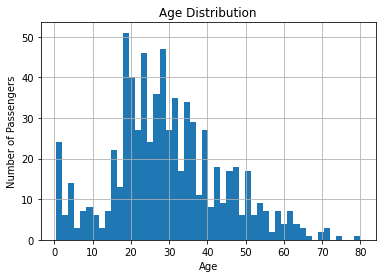

In [14]:
fig = df.Age.hist(bins=50)
fig.set_title('Age Distribution')
fig.set_xlabel('Age')
fig.set_ylabel('Number of Passengers')

Text(0, 0.5, 'Age')

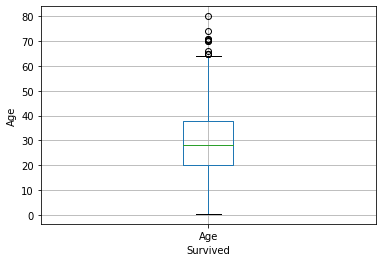

In [15]:
fig = df.boxplot(column='Age')
fig.set_title('')
fig.set_xlabel('Survived')
fig.set_ylabel('Age')

In [16]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [18]:
Upper_boundary = df.Age.mean() + 3* df.Age.std()
Lower_boundary = df.Age.mean() - 3* df.Age.std()

Upper_boundary, Lower_boundary

(73.27860964406095, -13.88037434994331)

In [19]:
# and for extreme outliers

IQR = df.Age.quantile(0.75) - df.Age.quantile(0.25)

Lower_fence = df.Age.quantile(0.25) - (IQR * 3)
Upper_fence = df.Age.quantile(0.75) + (IQR * 3)

Upper_fence, Lower_fence, IQR

(91.625, -33.5, 17.875)

In [21]:
df = df.dropna(subset=['Age'])

total_passengers = np.float(df.shape[0])

print('passengers older than 73 (Gaussian approach): {}'.format(
    df[df.Age > 73].shape[0] / total_passengers))

print('passengers older than 65 (IQR): {}'.format(
    df[df.Age > 65].shape[0] / total_passengers))

print('passengers older than 91 (IQR, extreme): {}'.format(
    df[df.Age >= 91].shape[0] / total_passengers))

passengers older than 73 (Gaussian approach): 0.0028011204481792717
passengers older than 65 (IQR): 0.011204481792717087
passengers older than 91 (IQR, extreme): 0.0


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [23]:
data= pd.read_csv('https://raw.githubusercontent.com/plthiyagu/Personnel/master/Dataset/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
data[['Age', 'Fare']].isnull().mean()

Age     0.198653
Fare    0.000000
dtype: float64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    data[['Age', 'Fare']].fillna(0),
    data.Survived,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((623, 2), (268, 2))

In [26]:
data_clean = data.copy()

# replace outliers in Age
# using the boundary from the Gaussian assumption method
data_clean.loc[data_clean.Age >= 73, 'Age'] = 73

# replace outliers in Fare
# using the boundary of the interquantile range method
data_clean.loc[data_clean.Fare > 100, 'Fare'] = 100

# Let's divide into train and test sets
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    data_clean[['Age', 'Fare']].fillna(0),
    data_clean.Survived,
    test_size=0.3,
    random_state=0)

In [27]:
logit = LogisticRegression(random_state=44)

# train model
logit.fit(X_train, y_train)

# make predicion on test set
pred = logit.predict_proba(X_test)

print('LogReg Accuracy: {}'.format(logit.score(X_test, y_test)))
print('LogReg roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

LogReg Accuracy: 0.6940298507462687
LogReg roc-auc: 0.71375


In [28]:
# model build on data without outliers

# call model
logit = LogisticRegression(random_state=44)

# train
logit.fit(X_train_clean, y_train_clean)

# make prediction on test set
pred = logit.predict_proba(X_test_clean)

print('LogReg Accuracy: {}'.format(logit.score(X_test_clean, y_test_clean)))
print('LogReg roc-auc: {}'.format(roc_auc_score(y_test_clean, pred[:, 1])))

LogReg Accuracy: 0.7052238805970149
LogReg roc-auc: 0.7149404761904762


In [29]:
# model built on data with outliers

# call model
ada = AdaBoostClassifier(n_estimators=200, random_state=44)

# train model
ada.fit(X_train, y_train)

# make predictions
pred = ada.predict_proba(X_test)

print('AdaBoost Accuracy: {}'.format(ada.score(X_test, y_test)))
print('AdaBoost roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

AdaBoost Accuracy: 0.7201492537313433
AdaBoost roc-auc: 0.7464583333333333


In [30]:
# model built on data with outliers

# call model
rf = RandomForestClassifier(n_estimators=200, random_state=39)

# train model
rf.fit(X_train, y_train)

# make predictions
pred = rf.predict_proba(X_test)

print('Random Forests Accuracy: {}'.format(rf.score(X_test, y_test)))
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

Random Forests Accuracy: 0.7089552238805971
Random Forests roc-auc: 0.732827380952381


In [31]:
# model built on data without outliers

# call model
rf = RandomForestClassifier(n_estimators=200, random_state=39)

# train model
rf.fit(X_train_clean, y_train_clean)

# make predictions
pred = rf.predict_proba(X_test_clean)

print('Random Forests Accuracy: {}'.format(rf.score(X_test_clean, y_test_clean)))
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test_clean, pred[:,1])))

Random Forests Accuracy: 0.6977611940298507
Random Forests roc-auc: 0.7289285714285714
